Import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

TODO 1: Read the data from ```data.csv``` using ```pandas```

In [54]:
# Complete TODO 1
data = pd.read_csv('data.csv')
# Store the column labelleed X as a numpy array named X 
X = data['X']
# Store the column labeled y as a numpy array named y
y = data['y']
# Ensure that you reshape them properly
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

TODO 2: Complete the ```normalize``` function. For a numpy array X, normalized output will be 
```(X - mean(X))/standard_devaiation(X)```


In [65]:
def normalize(X):
    #Complete TODO 2
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X - mean) / std
    return X_norm

X_norm = normalize(X)
y_norm = normalize(y)

# Initialize parameters
theta = np.random.randn(2, 1)  # We have 2 parameters (theta_0 and theta_1)

TODO 3: Complete the function ```complete_cost``` function below. Refer to Problem statement for the cost (error) function for linear regression.

Here, ```X``` : np.array of x-coordinates of points

```y``` : np.array of y-coordinates of points

```theta``` : np.array of parameters

In [66]:
def compute_cost(X, y, theta):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (x0 = 1)
    #Complete TODO 3
    predictions = X_b.dot(theta)
    errors = predictions - y
    # Calculate the cost
    cost = (1.0 / (2.0 * m)) * np.sum(errors ** 2)
    return cost

TODO 4: Implement Gradient Descent for linear regression according to algorithm given in the Problem Statement. Your only task is to update theta properly by finding the gradient correctly.

In [67]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (x0 = 1)
    cost_history = []

    for _ in range(iterations):
        #Complete TODO 4
        # Update theta
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        predictions = X_b.dot(theta)
        errors = predictions - y
        gradients = (1.0 / m) * X_b.T.dot(errors)
        theta -= learning_rate * gradients
    return theta, cost_history

TODO 5: Find ```theta_optimal``` and ```cost_history``` by calling the ```gradient_descent``` function. Also, print them.

In [68]:
learning_rate = 0.1
iterations = 1000

#Complete TODO 5
theta_optimal, cost_history = gradient_descent(X_norm, y_norm, theta, learning_rate, iterations)

In [69]:
theta_optimal

array([[9.97447734e-16],
       [8.77082403e-01]])

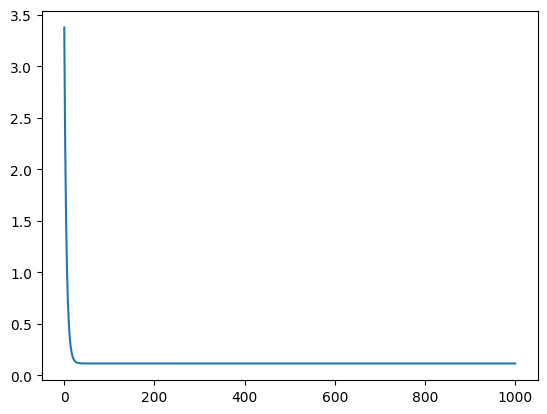

In [70]:
n = len(cost_history)
x = np.linspace(0, n, n)
plt.plot(x, cost_history)